In [ ]:
from typing import Counter
# install general modules required

!pip install googletrans==4.0.0rc1
!pip install datetime
!pip install vaderSentiment

import csv
import pandas as pd
import time
import nltk
import numpy as np
import textblob as tb
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import chardet
%matplotlib inline

from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

#Install TextBlob functionality
from textblob import TextBlob
from collections import Counter

#import lemmatizer
from nltk.stem import WordNetLemmatizer
nltk.download("wordnet")

import re
import spacy

#load train / test split
from sklearn.model_selection import train_test_split

# Import count vectorizer
from sklearn.feature_extraction.text import CountVectorizer

# Load the vectorizer library
from sklearn.feature_extraction.text import TfidfVectorizer

#Load Linear Regression
from sklearn.linear_model import LinearRegression

#Load Linear Regression
from sklearn.linear_model import LogisticRegression

#Load Decision Tree
from sklearn.tree import DecisionTreeClassifier

#Load Random Forest
from sklearn.ensemble import RandomForestClassifier

#Load SVM
from sklearn.svm import SVC

#Load KNN
from sklearn.neighbors import KNeighborsClassifier

#Load Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# Import mean square error
from sklearn.metrics import mean_squared_error

# Import classification report
from sklearn.metrics import classification_report

# Import accuracy
from sklearn.metrics import accuracy_score

# Install Google Trans, Date Time and WordCloud
from googletrans import Translator
from datetime import datetime

#Install WordCloud functionality
from wordcloud import WordCloud

#Install vaderSentiment using pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# install google colab, import and mount drive
from google.colab import drive
drive.mount('/content/drive')

#Initialise the Google Translate API
translator = Translator()





[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

# Function to remove special characters
def remove_special_characters(sentence):
    # Use regex to remove all characters that are not alphanumeric or spaces
    cleaned_sentence = re.sub(r'[^A-Za-z0-9 ]+', '', sentence)
    return cleaned_sentence

def format_special_characters (input_file, output_file):
   with open(input_file, 'rb') as f:
      result = chardet.detect(f.read())

    #Read the CSV file into a Panda Dataframe
   df = pd.read_csv(input_file)

    #Apply the function to the df
   df["text"] = df["text"].astype(str)
   df["text"] = df["text"].apply(remove_special_characters)

    #Save updated file
   df.to_csv(output_file, index = False)
   print ("Special Characters removed from file")

#function to remove stop words using SpaCy
def remove_stop_words(sentence):
    # Load the SpaCy English Language Model
    nlp = spacy.load('en_core_web_sm')

    # Tokenize the sentence into individual words
    doc = nlp(sentence)

    #Filter out stop words
    filtered_words = [token.text for token in doc if not token.is_stop]

    #Join the filtered words back into a string
    new_sentence = ' '.join(filtered_words)

    return new_sentence

def format_stop_words (input_file, output_file):
    with open(input_file, 'rb') as f:
       result = chardet.detect(f.read())

    #Read the CSV file into a Panda Dataframe
    df = pd.read_csv(input_file)

    #Apply the function to the df
    df["text"] = df["text"].astype(str)
    df["text"] = df["text"].apply(remove_stop_words)

    #Save updated file
    df.to_csv(output_file, index = False)
    print ("Stop Words removed from file")

#function to remove http from sentence
def remove_http_words(text):
    #Removes words starting with 'http' from the input text.

    words = str(text).split()
    cleaned_words = [word for word in words if not word.startswith("http")]
    cleaned_text = " ".join(cleaned_words)
    return cleaned_text

def format_http (input_file, output_file):
    with open(input_file, 'rb') as f:
        result = chardet.detect(f.read())

    #Read the CSV file into a Panda Dataframe
    df = pd.read_csv(input_file)

    #Apply the function to the df
    df["text"] = df["text"].apply(remove_http_words)

    #Save updated file
    df.to_csv(output_file, index = False)
    print ("Http words removed from file")

def format_duplicates (input_file, output_file):

    with open(input_file, 'rb') as f:
        result = chardet.detect(f.read())

    #Read the CSV file into a Panda Dataframe
    df = pd.read_csv(input_file)

    #sort the text field
    df.sort_values(by='text', inplace = True)

    #Remove duplicate entries
    df.drop_duplicates(subset='text', keep='first', inplace = True)

    #Write the final Dataframe to DeDup.csv
    df.to_csv(output_file, index = False)

    print("Duplicates removed from data file")

def remove_specific_words(sentence):

    #List of words to remove
    words_to_remove = [' amp ', ' co ', ' rt ', ' icshie ', ' today ', ' nt ', ' RT ', ' like ', ' said ' ]

    words = str(sentence).split()
    sentence = str(sentence).lower()

    #remove specific words from the column text
    for word in words_to_remove:
        sentence = sentence.replace(word, ' ')

    return sentence

def format_specific_words(input_file, output_file):

    with open(input_file, 'rb') as f:
       result = chardet.detect(f.read())

    #Read the CSV file into a Panda Dataframe
    df = pd.read_csv(input_file)

    #apply the function to the df
    df["text"] = df["text"].apply(remove_specific_words)

    #Save updated file
    df.to_csv(output_file, index = False)
    print ("Specific Words removed from file")

def format_lemmatizer(input_file, output_file):

    lemmatizer = WordNetLemmatizer()
    with open(input_file, 'rb') as f:
       result = chardet.detect(f.read())

    #Read the CSV file into a Panda Dataframe
    df = pd.read_csv(input_file)

    #apply the function to the df
    df["text"] = df["text"].astype(str)
    df["text"] = df["text"].apply(lambda x: " " .join(lemmatizer.lemmatize(word) for word in x.split()))

    #Save updated file
    df.to_csv(output_file, index = False)
    print ("Lemmatization has been applied to the file")

def word_cloud (file, socialmedia):
    with open(file, 'rb') as f:
       result = chardet.detect(f.read())

    #read in a csv file
    csv_file = file
    df = pd.read_csv(file)

    # combine all the text entries into a single string
    df["text"] = df["text"].astype(str)
    all_text = " ".join(df["text"])

    #create a word cloud image
    wc = WordCloud(width=800, height=400, background_color="white").generate(all_text)

    title = socialmedia + " Word Cloud"
    # Display the word cloud
    plt.figure(figsize=[10,6])
    plt.imshow(wc, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()

#function to count word frequncies
def count_word_frequencies (file, socialmedia):
    #Read the file and split it into words
    with open(file, 'rb') as f:
       result = chardet.detect(f.read())

    #read in a csv file
    csv_file = file
    df = pd.read_csv(file)

   # combine all the text entries into a single string
    df["text"] = df["text"].astype(str)
    all_text = " ".join(df["text"])

    # split the text into words
    words = all_text.lower().split()

    #Count word frequencies = Counter(words)
    word_frequencies = Counter(words)

    #Display the top 25 word frequencies
    top_words = word_frequencies.most_common(25)
    title = "Top 25 Word Frequencies - " + socialmedia

    #Create a bar chart
    plt.figure(figsize=(7, 4))
    plt.bar([word for word, freq in top_words], [freq for word, freq in top_words])
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.title(title)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

#function to perform sentiment analysis using the Vader overall (Valence Aware Dictionary and sEntiment Reasoner)
def sentiment_scores_vader(sentence, socialmedia, user):
    # Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()
    # Get sentiment scores for the sentence
    sentiment_dict = sid_obj.polarity_scores(sentence)
    # Print overall sentiment dictionary
    print(socialmedia + " " + user + " records Vader Overall sentiment dictionary:", sentiment_dict)
    print(socialmedia + " " + user + " records Vader Sentence was rated as {:.2f}% Negative".format(sentiment_dict['neg'] * 100))
    print(socialmedia + " " + user + " records Vader Sentence was rated as {:.2f}% Neutral".format(sentiment_dict['neu'] * 100))
    print(socialmedia + " " + user + " records Vader Sentence was rated as {:.2f}% Positive".format(sentiment_dict['pos'] * 100))

    # Determine overall sentiment
    if sentiment_dict['compound'] >= 0.05:
        print(socialmedia + " " + user + " records Vader Sentence Overall Rated As Positive")
    elif sentiment_dict['compound'] <= -0.05:
        print(socialmedia + " " + user + " records Vader Sentence Overall Rated As Negative")
    else:
        print(socialmedia + " " + user + " records Vader Sentence Overall Rated As Neutral")


#function to perform sentiment analysis using the Vader at message level (Valence Aware Dictionary and sEntiment Reasoner)
def sentiment_scores_vader_message(sentence):

    # Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()
    # Get sentiment scores for the sentence
    sentiment_dict = sid_obj.polarity_scores(sentence)

    # Determine sentiment
    if sentiment_dict['compound'] >= 0.05:
        sentence = "Positive"
    elif sentiment_dict['compound'] <= -0.05:
        sentence = "Negative"
    else:
        sentence = "Neutral"
    return sentence

#function to perform sentiment analysis using the Vader at message level (Valence Aware Dictionary and sEntiment Reasoner)
def sentiment_scores_vader_score(sentence):

    # Create a SentimentIntensityAnalyzer object
    sid_obj = SentimentIntensityAnalyzer()
    # Get sentiment scores for the sentence
    sentiment_dict = sid_obj.polarity_scores(sentence)

    return sentiment_dict['compound']

#function to perform sentiment analysis using Textblob on overall
def sentiment_scores_textblob(sentence, socialmedia, user):
    # Create a TextBlob object
    blob = TextBlob(sentence)

    #Get polarity score (-1 to 1)
    polarity = blob.sentiment.polarity

    #Get subjectivity score (0 to 1)
    subjectivity = blob.sentiment.subjectivity

    #Determine sentiment based on polarity
    if polarity > 0:
      sentiment = "Positive"
    elif polarity < 0:
      sentiment = "Negative"
    else:
      sentiment = "Neutral"

    print(socialmedia + " " + user + " records Text Blob Overall sentiment: ", sentiment)
    print(socialmedia + " " + user + " records Text Blob Overall polarity: ", polarity)
    print(socialmedia + " " + user + " records Text Blob Overall subjectivity: ", subjectivity)
   # return sentiment, polarity, subjectivity

#function to perform sentiment analysis using the Textblob at message level
def sentiment_scores_textblob_message(sentence):

    # Create a TextBlob object
    blob = TextBlob(sentence)

    #Get polarity score (-1 to 1)
    polarity = blob.sentiment.polarity

    #Get subjectivity score (0 to 1)
    subjectivity = blob.sentiment.subjectivity

    #Determine sentiment based on polarity
    if polarity > 0:
      sentiment = "Positive"
    elif polarity < 0:
      sentiment = "Negative"
    else:
      sentiment = "Neutral"

    return sentiment

#function to perform polarity analysis using the Textblob at message level
def polarity_scores_textblob_message(sentence):

    # Create a TextBlob object
    blob = TextBlob(sentence)

    #Get polarity score (-1 to 1)
    polarity = blob.sentiment.polarity

    return polarity

#function to perform subjectivity analysis using the Textblob at message level
def subjectivity_scores_textblob_message(sentence):

    # Create a TextBlob object
    blob = TextBlob(sentence)

    #Get subjectivity score (0 to 1)
    subjectivity = blob.sentiment.subjectivity

    return subjectivity

#function to perform objectivity analysis using the Textblob at message level
def objectivity_scores_textblob_message(sentence):

    # Create a TextBlob object
    blob = TextBlob(sentence)

    #Get subjectivity score (0 to 1)
    objectivity = 1 - blob.sentiment.subjectivity

    return objectivity

def calculate_sentimentscore (file, socialmedia, user):
    with open(file, 'rb') as f:
       result = chardet.detect(f.read())

    #read in a csv file
    csv_file = file
    df = pd.read_csv(file)

    # combine all the text entries into a single string
    if socialmedia == "Twitter":
         df["text"] = df["text"].astype(str)
         if user == "all":
             all_text = " ".join(df["text"])
         else:
             filtered_df = df[df['name'] == user]
             all_text = " ".join(filtered_df["text"])
    else:
         df["text"] = df["text"].astype(str)
         if user == "all":
             all_text = " ".join(df["text"])
         else:
             filtered_df = df[df['Sender'] == user]
             all_text = " ".join(filtered_df["text"])

   # sentiment_scores_vader (all_text, socialmedia, user)

    #count the number of records
    if user == "all":
         vader_count = df["vaderscore"].value_counts()[['Positive', 'Neutral', 'Negative']]
    else:
        vader_count = filtered_df["vaderscore"].value_counts()[['Positive', 'Neutral', 'Negative']]

    plt.figure(figsize=(3,2))

    vader_count.plot(kind = 'bar', color=['green', 'blue', 'red'])
    title = socialmedia + " - " + user + " Vader Sentiment"

    plt.title(title)
    plt.ylabel("Number of records")
    plt.ylabel("Sentiment Distribution")
    plt.grid(axis="y")

    #display the graph
    plt.show()

    sentiment_scores_textblob (all_text, socialmedia, user)

    if user == "all":
        textblob_count = df["textblob"].value_counts()[['Positive', 'Neutral', 'Negative']]
    else:
        textblob_count = filtered_df["textblob"].value_counts()[['Positive', 'Neutral', 'Negative']]

    plt.figure(figsize=(3,2))

    textblob_count.plot(kind = 'bar', color=['green', 'blue', 'red'])
    title = socialmedia + " - " + user + " TextBlob Sentiment"
    plt.title(title)
    plt.ylabel("Number of records")
    plt.ylabel("Sentiment Distribution")
    plt.grid(axis="y")

    #display the graph
    plt.show()

def calculate_message_sentimentscore (input_file, output_file, socialmedia):
    with open(input_file, 'rb') as f:
       result = chardet.detect(f.read())

    #read in a csv file
    csv_file = input_file
    df = pd.read_csv(input_file)

    df["vaderscore"] = ""
    df["vadersentiment"] = ""
    df["textblob"] = ""
    df["TBPolarity"] = ""
    df["TBSubjectivity"] = ""
    df["TBObjectivity"] = ""
    # combine all the text entries into a single string
    df["text"] = df["text"].astype(str)

    #apply the Varder sentiment function to the df
    df["vaderscore"] = df["text"].apply(sentiment_scores_vader_message)

    df["vadersentiment"] =  df["text"].apply(sentiment_scores_vader_score)

    #apply the TextBlob sentiment function to the df
    df["textblob"] = df["text"].apply(sentiment_scores_textblob_message)

    #apply the TextBlob polarity function to the df
    df["TBPolarity"] = df["text"].apply(polarity_scores_textblob_message)

    #apply the TextBlob sentiment function to the df
    df["TBSubjectivity"] = df["text"].apply(subjectivity_scores_textblob_message)

    #apply the TextBlob sentiment function to the df
    df["TBObjectivity"] = df["text"].apply(objectivity_scores_textblob_message)

    #Save updated file
    df.to_csv(output_file, index = False)
    print ("Vader + TextBlob sentiment added to the file")


def calculatemodelresults(input_file, X, y, model, sm_channel):

    score_type = ""

    if y == "vaderscore":
      score_type = "VADER"
    else:
      score_type = "TextBlob"

    df = pd.read_csv(input_file)
    X = df[X].fillna('')
    y = df[y].fillna('')

    #Split the data (80% train, 20% test)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    #Create the Vectorizer
    vectorizer_vec = CountVectorizer(max_features=1000)
    vectorizer_tfidf = TfidfVectorizer(max_features=1000)

    #Fit and Transform the Training data
    X_train_vec = vectorizer_vec.fit_transform(X_train)
    X_test_vec = vectorizer_vec.transform(X_test)
    X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
    X_test_tfidf = vectorizer_tfidf.transform(X_test)

    model_vec = ""
    model_tfidf = ""
    model_name = ""

    if model == "LR":
      # Initalize the Linear Regression Model
      model_vec = LogisticRegression()
      model_tfidf = LogisticRegression()
      model_name = "Logistic Regression"

    if model == "DT":
      # Initalize the Decision Tree Model
      model_vec = DecisionTreeClassifier()
      model_tfidf = DecisionTreeClassifier()
      model_name = "Decision Tree"

    if model == "RF":
      # Initalize the Random Forest Model
      model_vec = RandomForestClassifier()
      model_tfidf = RandomForestClassifier()
      model_name = "Random Forest"

    if model == "SVM":
      # Initalize the SVM
      model_vec = SVC(kernel = 'linear')
      model_tfidf = SVC(kernel = 'linear')
      model_name = "Support Vector Machine"

    if model == "KNN":
      # Initalize the K Nearest Neighbour Model
      model_vec = KNeighborsClassifier(n_neighbors=5)
      model_tfidf = KNeighborsClassifier(n_neighbors=5)
      model_name = "K-Nearest Neighbor"

    if model == "NB":
      # Initalize the Naive Bayes Model
      model_vec = MultinomialNB()
      model_tfidf = MultinomialNB()
      model_name = "Naive Bayes"

    #Fit the model to the training data
    model_vec.fit(X_train_vec, y_train)
    model_tfidf.fit(X_train_tfidf, y_train)

    #Make the prediction on the test data
    y_pred_vec = 0
    y_pred_tfidf = 0
    y_pred_vec = model_vec.predict(X_test_vec)
    y_pred_tfidf = model_tfidf.predict(X_test_tfidf)

    #For Logistic Regression, Decision Tree, Random Forest Classifier, SVM, KNN, Naive Bayes
    print("Count Vectorizer Classification Report " + model_name + " " + score_type + " " + sm_channel + " data" )
    print(classification_report (y_test, y_pred_vec))
    # Print CV Accuracy score
    print("Count Vectorizer Accuracy Score " + model_name + " " + score_type + " " + sm_channel + " data" )
    print(accuracy_score(y_test, y_pred_vec))
    print ("")
    print("TF-IDF Classification Report " + model_name + " " + score_type + " " + sm_channel + " data" )
    print(classification_report (y_test, y_pred_tfidf))
    # Print TF-IDF Accuracy score
    print("TF-IDF Accuracy Score " + model_name + " " + score_type+ " " + sm_channel + " data" )
    print(accuracy_score (y_test, y_pred_tfidf))

In [ ]:
# Twitter aka X installation modules

import tweepy
#import scipy.sparse
from scipy import sparse
#create an empty list to store the tweets
messages = []
#APP ID = 28439699
API_Key = 'WbDM3PQQvKJEi6n8By6mxm5r0'
API_Key_Secret = 'KX0jL67XzyOehH5S78XsZbTXEiSNclNEVkPr9LTx6aGvo8oxkx'

consumer_key = API_Key
consumer_secret = API_Key_Secret
access_token = '3237121324-1oVLPpTm54zz8QpOXfRLxboARANlRjJvYZNPcac'
access_token_secret = 'Rk4m7UypNNhpAeNBhIXxt76F96DEQL9p61VawlD9Y2TZQ'

#authenticate with Twitter API
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token (access_token, access_token_secret)

#create a new Tweepy API client
api = tweepy.API(auth, wait_on_rate_limit=True)
client = tweepy.Client(bearer_token = 'AAAAAAAAAAAAAAAAAAAAAJP0sQEAAAAAeSPqGcFM7yR4lLzYTTa4%2BGG2jN8%3D4FQxvWdaK2IShU20dpZMiVls5J5yl21RkJ1Az83lZpztiYPfj7')



In [ ]:
# Query by a Topic for example #ReportCard2024
query = '#irishhousingmarket'
tweet_count = 100 #adjust as needed
#create a pagniator for the User's Tweets
tweets = tweepy.Paginator(client.search_recent_tweets, query=query,
                                max_results=tweet_count).flatten(limit=tweet_count)

#initialise an empty list to store the Tweets
tweet_list = []

for tweet in tweets:
  print (f"Tweet ID: {tweet.id}")
  print (f"Tweet Text: {tweet.text}")

  tweet_list.append({"id": tweet.id, "text": tweet.text })

  #Create a Panda Dataframe from the list of messages

  df = pd.DataFrame(tweet_list)
  #Save the dataframe to a CSV file
  df.to_csv('/content/drive/My Drive/Aedeen/Twitter/tweetbytopics.csv', index=False)




In [ ]:
## Query by a User
#In this example using Muslim sisters of Eire = iduser retrieved from website https://twiteridfinder.com/
iduser = 21092224
tweet_count = 100 #adjust as needed

#create a pagniator for the User's Tweets
tweets = tweepy.Paginator(client.get_users_tweets, id=iduser,
                                max_results=tweet_count).flatten(limit=tweet_count)

#initialise an empty list to store the Tweets
tweet_list = []

for tweet in tweets:
  print (f"Tweet ID: {tweet.id}")
  print (f"Tweet Text: {tweet.text}")

  tweet_list.append({"id": tweet.id, "text": tweet.text })

  #Create a Panda Dataframe from the list of messages

  df = pd.DataFrame(tweet_list)
  #Save the dataframe to a CSV file
  df.to_csv('/content/drive/My Drive/Aedeen/Twitter/tweetbyuser.csv', index=False)

Tweet ID: 1771205381110260058
Tweet Text: Happy Friday! We're #hiring. 

💚 Director of Services
💚 Volunteer &amp; Student Community Engagement Administrator
💚 Project Worker's  
💚 And More!

Apply Today 👇
https://t.co/CwCYbLVRNv

#ChildhoodLastsALifetime https://t.co/4AkoQpvz34
Tweet ID: 1771100682306650327
Tweet Text: @stkevinsdublin Thank you so much for your wonderful support 💚
Tweet ID: 1771098389318394066
Tweet Text: @colaisteanatha Thank you so much for visiting our Wexford Shop! 😊
Tweet ID: 1771098036388729099
Tweet Text: @gaelscoildurlas An-mhaith! We hope the class have fun doing the programme 💚
Tweet ID: 1770854746720551363
Tweet Text: Agencies from Cavan Monaghan coming together today to launch new resources developed by children, for children experiencing childhood domestic violence &amp; abuse.

Together we can bloom into something beautiful 💚

@tusla @SAFEIreland @CypscIrl @gardainfo https://t.co/30THQ2SPgi
Tweet ID: 1770752309363945669
Tweet Text: If you are a parent who

In [ ]:
tweeter = '/content/drive/My Drive/Aedeen/Twitter/tweeters.csv'
final_file = '/content/drive/My Drive/Aedeen/Twitter/TwitterMerged.csv'

with open(tweeter, 'rb') as f:
  result = chardet.detect(f.read())

#initialise an empty list to store Dataframes
dfs = []

#Read the CSV file into a Panda Dataframe
df = pd.read_csv(tweeter,  encoding =result['encoding'])

#Itterate over each row in the Dataframe
for index, row in df.iterrows():
  #Get the channel ID from the 2nd column
  tweeter = row['name']
  print(tweeter)
  # csv file is the directory and chanel name
  csv_file = '/content/drive/My Drive/Aedeen/Twitter/' + tweeter + '.csv'
  # load the contet of the file into file_content and append to dfs
  file_content = pd.read_csv(csv_file)
  dfs.append(file_content)

#Concatenate all Dataframes into one
final_df = pd.concat(dfs, ignore_index = True)

#Write the final Dataframe to Telegram.csv
final_df.to_csv(final_file, index = False)
print("Contents to merged Twitter Merged file successful")




archireland
Barnardos
breakingnewsie
caulmick
citizensinfo
CoonanProperty
coophousingie
Cork_Simon
CouncilJournal
Crosscare1
daftmedia
DarraghOBrienTD
dcediy
DepaulIreland
DeptHousingIRL
DeptJusticeIRL
dlrcc
dng_ie
Dublin_Simon
dublinhomes
DublinRealEstate
DundalkSimon1
eoincarrollis
eolasmagazine
epicireland
Fingalcoco
FocusIreland
fold_housing
frank_oconnor
galwaysimon
GeoDirectory_ie
HomelessDublin
HousingAgencyIE
HousingIreland
howirelandworks
icsh_ie
immigrationIRL
irelandisfull
irishexaminer
irishproperty
IrishRefugeeCo
IrishTimes
IrishTimesHome
joeliveline
LGMAIreland
MerchantsQuayIR
MigrantRightsIr
Msoe_Dublin
NWCI
PMVTrust
rentfairy
RespondHousing
RoryHearneGaffs
rtenews
SAFEIreland
SimonCommunity
ThresholdIRE
tuathhousing
vacantieland
Womens_Aid
Contents to merged Twitter Merged file successful


In [ ]:
#read in Twitter Merged file
twitter_merged = '/content/drive/My Drive/Aedeen/Twitter/TwitterMerged.csv'
twitter_dedup = '/content/drive/My Drive/Aedeen/Twitter/TwitterDeDup.csv'

format_duplicates(twitter_merged, twitter_dedup)


Duplicates removed from data file


In [ ]:
twitter_dedup = '/content/drive/My Drive/Aedeen/Twitter/TwitterDeDup.csv'
twitter_NoHttpWords = '/content/drive/My Drive/Aedeen/Twitter/TwitterNoHttpWords.csv'

format_http (twitter_dedup, twitter_NoHttpWords)

Http words removed from file


In [ ]:
twitter_NoHttpWords = '/content/drive/My Drive/Aedeen/Twitter/TwitterNoHttpWords.csv'
twitter_NoSpChar = '/content/drive/My Drive/Aedeen/Twitter/TwitterNoSpChar.csv'

format_special_characters (twitter_NoHttpWords, twitter_NoSpChar)

Special Characters removed from file


In [ ]:
twitter_NoSpChar = '/content/drive/My Drive/Aedeen/Twitter/TwitterNoSpChar.csv'
twitter_NoStopWords = '/content/drive/My Drive/Aedeen/Twitter/TwitterNoStopWords.csv'

format_stop_words(twitter_NoSpChar, twitter_NoStopWords)


Stop Words removed from file


In [ ]:
twitter_NoStopWords = '/content/drive/My Drive/Aedeen/Twitter/TwitterNoStopWords.csv'
twitter_NoSpecificWords = '/content/drive/My Drive/Aedeen/Twitter/TwitterNoSpecificWords.csv'

format_specific_words(twitter_NoStopWords, twitter_NoSpecificWords)


Specific Words removed from file


In [ ]:
twitter_NoSpecificWords = '/content/drive/My Drive/Aedeen/Twitter/TwitterNoSpecificWords.csv'
twitter_Lemmatizer = '/content/drive/My Drive/Aedeen/Twitter/TwitterLemmatizer.csv'

format_lemmatizer(twitter_NoSpecificWords, twitter_Lemmatizer)

Lemmatization has been applied to the file


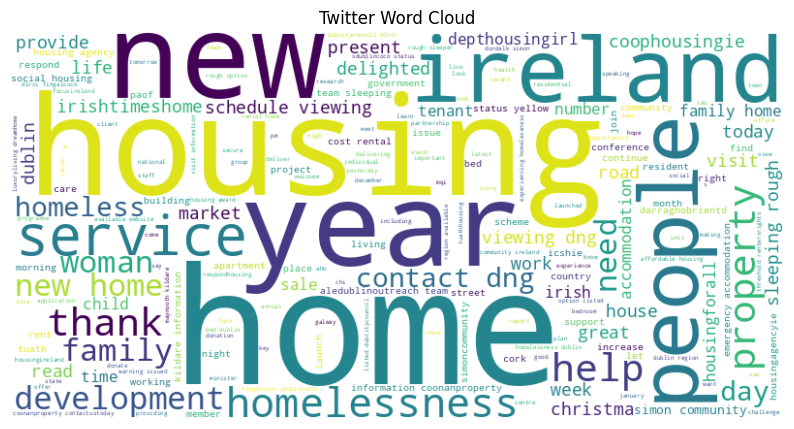

In [ ]:
# create the word cloud

twitter_Lemmatizer = '/content/drive/My Drive/Aedeen/Twitter/TwitterLemmatizer.csv'

word_cloud (twitter_Lemmatizer, "Twitter")

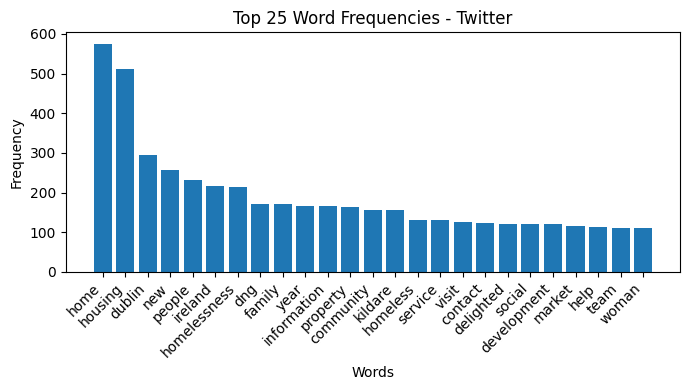

In [ ]:
#count word frequencies

twitter_Lemmatizer = '/content/drive/My Drive/Aedeen/Twitter/TwitterLemmatizer.csv'

count_word_frequencies(twitter_Lemmatizer, "Twitter")

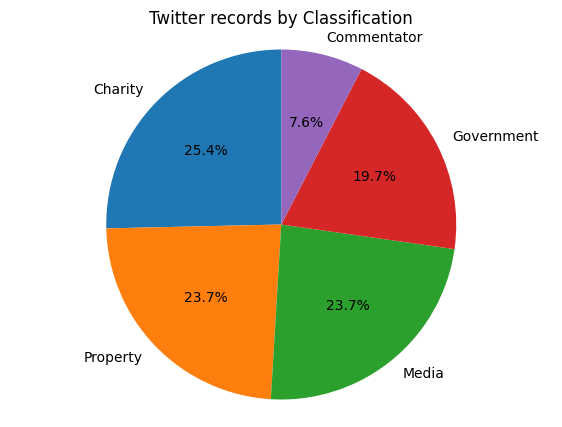

In [ ]:
#Create a pie chart of share of tweets per group

tweeter = '/content/drive/My Drive/Aedeen/Twitter/tweeters.csv'
twitter_Lemmatizer = '/content/drive/My Drive/Aedeen/Twitter/TwitterLemmatizer.csv'

with open(tweeter, 'rb') as f:
  result = chardet.detect(f.read())

#initialise an empty list to store Dataframes
dfs = []

#Read the CSV file into a Panda Dataframe
dfTweeter = pd.read_csv(tweeter,  encoding =result['encoding'])

with open(twitter_Lemmatizer, 'rb') as f:
  result = chardet.detect(f.read())

#Read the CSV file into a Panda Dataframe
dfFile = pd.read_csv(twitter_Lemmatizer,  encoding =result['encoding'])

#Merge the file
merged_df = pd.merge(dfTweeter, dfFile, on="name")

#count the number of records
classification_count = merged_df["Classification"].value_counts()

#Create a pie chart
plt.figure(figsize=(7, 5))
plt.pie(classification_count, labels=classification_count.index, autopct="%1.1f%%", startangle=90)
plt.title("Twitter records by Classification")
plt.axis("equal")

#Show the chart
plt.show()

In [ ]:
# Measure the sentiment analysis at social media type, text level

twitter_Lemmatizer = '/content/drive/My Drive/Aedeen/Twitter/TwitterLemmatizer.csv'
twitter_MessageSentiment = '/content/drive/My Drive/Aedeen/Twitter/TwitterMessageSentiment.csv'
calculate_message_sentimentscore (twitter_Lemmatizer, twitter_MessageSentiment, "Twitter")

Vader + TextBlob sentiment added to the file


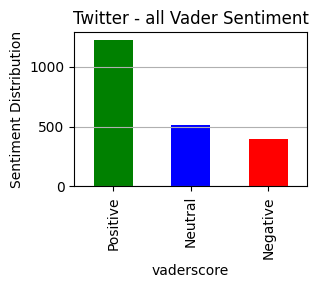

Twitter all records Text Blob Overall sentiment:  Positive
Twitter all records Text Blob Overall polarity:  0.1923804181442519
Twitter all records Text Blob Overall subjectivity:  0.47718863466720596


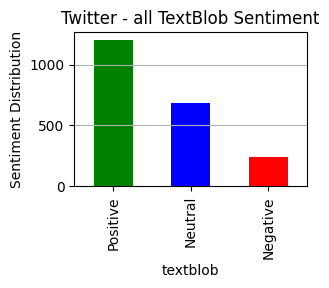

In [ ]:
# Measure the sentiment analysis at social media type level

twitter_MessageSentiment = '/content/drive/My Drive/Aedeen/Twitter/TwitterMessageSentiment.csv'
calculate_sentimentscore (twitter_MessageSentiment, "Twitter", "all")

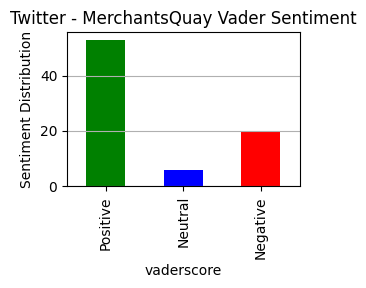

Twitter MerchantsQuay records Text Blob Overall sentiment:  Positive
Twitter MerchantsQuay records Text Blob Overall polarity:  0.11899177026182375
Twitter MerchantsQuay records Text Blob Overall subjectivity:  0.505234642066193


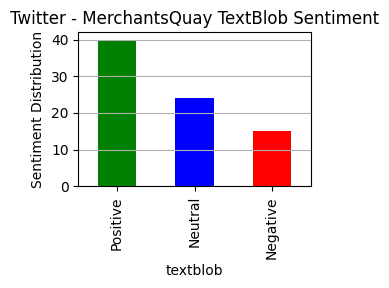

In [ ]:
# Measure the sentiment analysis at social media type, user level

twitter_MessageSentiment = '/content/drive/My Drive/Aedeen/Twitter/TwitterMessageSentiment.csv'
calculate_sentimentscore (twitter_MessageSentiment, "Twitter", "MerchantsQuay")



In [ ]:
# Split the test file, pass in the X and y values, call the Vectors and fit / transform data for Vader

twitter_MessageSentiment = '/content/drive/My Drive/Aedeen/Twitter/TwitterMessageSentiment.csv'


In [ ]:
# Call Linear Regression Model for Vader results
calculatemodelresults (twitter_MessageSentiment, "text", "vaderscore", "LR", "Twitter")

Count Vectorizer Classification Report Logistic Regression VADER Twitter data
              precision    recall  f1-score   support

    Negative       0.67      0.62      0.64        73
     Neutral       0.71      0.70      0.71       121
    Positive       0.81      0.84      0.82       233

    accuracy                           0.76       427
   macro avg       0.73      0.72      0.72       427
weighted avg       0.76      0.76      0.76       427

Count Vectorizer Accuracy Score Logistic Regression VADER Twitter data
0.7611241217798594

TF-IDF Classification Report Logistic Regression VADER Twitter data
              precision    recall  f1-score   support

    Negative       0.85      0.53      0.66        73
     Neutral       0.85      0.55      0.67       121
    Positive       0.72      0.94      0.81       233

    accuracy                           0.76       427
   macro avg       0.81      0.67      0.71       427
weighted avg       0.78      0.76      0.75       427

T

In [ ]:
# Call Decision Tree Model for Vader results
calculatemodelresults (twitter_MessageSentiment, "text", "vaderscore", "DT", "Twitter")

Count Vectorizer Classification Report Decision Tree VADER
              precision    recall  f1-score   support

    Negative       0.59      0.66      0.62        73
     Neutral       0.60      0.53      0.56       121
    Positive       0.73      0.75      0.74       233

    accuracy                           0.67       427
   macro avg       0.64      0.64      0.64       427
weighted avg       0.67      0.67      0.67       427

Count Vectorizer Accuracy Score Decision Tree VADER
0.6697892271662763

TF-IDF Classification Report Decision Tree VADER
              precision    recall  f1-score   support

    Negative       0.59      0.70      0.64        73
     Neutral       0.61      0.55      0.58       121
    Positive       0.74      0.74      0.74       233

    accuracy                           0.68       427
   macro avg       0.65      0.66      0.65       427
weighted avg       0.68      0.68      0.68       427

TF-IDF Accuracy Score Decision Tree VADER
0.67681498829039

In [ ]:
# Call the Random Forest Model for Vader results

calculatemodelresults (twitter_MessageSentiment, "text", "vaderscore", "RF", "Twitter")

Count Vectorizer Classification Report Random Forest VADER
              precision    recall  f1-score   support

    Negative       0.77      0.67      0.72        73
     Neutral       0.81      0.51      0.63       121
    Positive       0.73      0.89      0.80       233

    accuracy                           0.75       427
   macro avg       0.77      0.69      0.71       427
weighted avg       0.76      0.75      0.74       427

Count Vectorizer Accuracy Score Random Forest VADER
0.747072599531616

TF-IDF Classification Report Random Forest VADER
              precision    recall  f1-score   support

    Negative       0.79      0.67      0.73        73
     Neutral       0.73      0.51      0.60       121
    Positive       0.73      0.88      0.80       233

    accuracy                           0.74       427
   macro avg       0.75      0.69      0.71       427
weighted avg       0.74      0.74      0.73       427

TF-IDF Accuracy Score Random Forest VADER
0.737704918032786

In [ ]:
# Call the SVM model for Vader results

# Initalize the SVM model
calculatemodelresults (twitter_MessageSentiment, "text", "vaderscore", "SVM", "Twitter")


Count Vectorizer Classification Report
              precision    recall  f1-score   support

    Negative       0.52      0.64      0.58        73
     Neutral       0.72      0.70      0.71       121
    Positive       0.82      0.77      0.80       233

    accuracy                           0.73       427
   macro avg       0.69      0.71      0.69       427
weighted avg       0.74      0.73      0.73       427

TF-IDF Classification Report
              precision    recall  f1-score   support

    Negative       0.79      0.56      0.66        73
     Neutral       0.79      0.59      0.67       121
    Positive       0.73      0.90      0.81       233

    accuracy                           0.75       427
   macro avg       0.77      0.68      0.71       427
weighted avg       0.76      0.75      0.74       427

Count Vectorizer Accuracy Score
0.7306791569086651
TF-IDF Accuracy Score
0.7517564402810304


In [ ]:
# Call the KNN Model for Vader results

# Initalize the KNN model
calculatemodelresults (twitter_MessageSentiment, "text", "vaderscore", "KNN", "Twitter")


Count Vectorizer Classification Report K-Nearest Neighbor VADER Twitter data
              precision    recall  f1-score   support

    Negative       0.34      0.75      0.47        73
     Neutral       0.53      0.64      0.58       121
    Positive       0.82      0.42      0.56       233

    accuracy                           0.54       427
   macro avg       0.56      0.60      0.53       427
weighted avg       0.66      0.54      0.55       427

Count Vectorizer Accuracy Score K-Nearest Neighbor VADER Twitter data
0.5386416861826698

TF-IDF Classification Report K-Nearest Neighbor VADER Twitter data
              precision    recall  f1-score   support

    Negative       0.65      0.70      0.67        73
     Neutral       0.56      0.50      0.52       121
    Positive       0.74      0.76      0.75       233

    accuracy                           0.68       427
   macro avg       0.65      0.65      0.65       427
weighted avg       0.67      0.68      0.67       427

TF-I

In [ ]:
# Call the the Naive Bayes model for Vader results

# Initalize the Naive Bayes model
calculatemodelresults (twitter_MessageSentiment, "text", "vaderscore", "NB", "Twitter")


Count Vectorizer Classification Report
              precision    recall  f1-score   support

    Negative       0.67      0.73      0.70        73
     Neutral       0.69      0.68      0.69       121
    Positive       0.78      0.77      0.78       233

    accuracy                           0.74       427
   macro avg       0.72      0.73      0.72       427
weighted avg       0.74      0.74      0.74       427

TF-IDF Classification Report
              precision    recall  f1-score   support

    Negative       0.87      0.53      0.66        73
     Neutral       0.82      0.42      0.56       121
    Positive       0.68      0.93      0.78       233

    accuracy                           0.72       427
   macro avg       0.79      0.63      0.67       427
weighted avg       0.75      0.72      0.70       427

Count Vectorizer Accuracy Score
0.7377049180327869
TF-IDF Accuracy Score
0.7189695550351288


In [ ]:
# Split the test file, pass in the X and y values, call the Vectors and fit / transform data for TextBlob

twitter_MessageSentiment = '/content/drive/My Drive/Aedeen/Twitter/TwitterMessageSentiment.csv'


In [ ]:
# Call Linear Regression Model for TEXTBLOB results
calculatemodelresults (twitter_MessageSentiment, "text", "textblob", "LR", "Twitter")


Count Vectorizer Classification Report Logistic Regression TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.70      0.44      0.54        59
     Neutral       0.76      0.78      0.77       143
    Positive       0.82      0.88      0.85       225

    accuracy                           0.79       427
   macro avg       0.76      0.70      0.72       427
weighted avg       0.78      0.79      0.78       427

Count Vectorizer Accuracy Score Logistic Regression TextBlob Twitter data
0.7892271662763466

TF-IDF Classification Report Logistic Regression TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.93      0.22      0.36        59
     Neutral       0.77      0.59      0.67       143
    Positive       0.68      0.92      0.79       225

    accuracy                           0.71       427
   macro avg       0.79      0.58      0.60       427
weighted avg       0.75      0.71      0.69    

In [ ]:
# Call Decision Tree Model for TEXTBLOB results
calculatemodelresults (twitter_MessageSentiment, "text", "textblob", "DT", "Twitter")

Count Vectorizer Classification Report Decision Tree TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.48      0.37      0.42        59
     Neutral       0.69      0.70      0.70       143
    Positive       0.81      0.85      0.83       225

    accuracy                           0.74       427
   macro avg       0.66      0.64      0.65       427
weighted avg       0.73      0.74      0.73       427

Count Vectorizer Accuracy Score Decision Tree TextBlob Twitter data
0.7353629976580797

TF-IDF Classification Report Decision Tree TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.54      0.37      0.44        59
     Neutral       0.68      0.74      0.71       143
    Positive       0.83      0.84      0.84       225

    accuracy                           0.74       427
   macro avg       0.68      0.65      0.66       427
weighted avg       0.74      0.74      0.74       427

TF-IDF Acc

In [ ]:
# Call the Random Forest Model for TEXTBLOB results

calculatemodelresults (twitter_MessageSentiment, "text", "textblob", "RF", "Twitter")


Count Vectorizer Classification Report Random Forest TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.72      0.39      0.51        59
     Neutral       0.73      0.83      0.78       143
    Positive       0.84      0.86      0.85       225

    accuracy                           0.79       427
   macro avg       0.76      0.69      0.71       427
weighted avg       0.78      0.79      0.78       427

Count Vectorizer Accuracy Score Random Forest TextBlob Twitter data
0.7868852459016393

TF-IDF Classification Report Random Forest TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.88      0.36      0.51        59
     Neutral       0.74      0.80      0.77       143
    Positive       0.79      0.88      0.83       225

    accuracy                           0.78       427
   macro avg       0.80      0.68      0.70       427
weighted avg       0.79      0.78      0.77       427

TF-IDF Acc

In [ ]:
# Call the SVM model for TEXTBLOB results

# Initalize the SVM model
calculatemodelresults (twitter_MessageSentiment, "text", "textblob", "SVM", "Twitter")

Count Vectorizer Classification Report
              precision    recall  f1-score   support

    Negative       0.59      0.56      0.57        59
     Neutral       0.70      0.75      0.73       143
    Positive       0.84      0.82      0.83       225

    accuracy                           0.76       427
   macro avg       0.71      0.71      0.71       427
weighted avg       0.76      0.76      0.76       427

TF-IDF Classification Report
              precision    recall  f1-score   support

    Negative       0.76      0.27      0.40        59
     Neutral       0.74      0.63      0.68       143
    Positive       0.72      0.91      0.80       225

    accuracy                           0.73       427
   macro avg       0.74      0.60      0.63       427
weighted avg       0.73      0.73      0.71       427

Count Vectorizer Accuracy Score
0.7611241217798594
TF-IDF Accuracy Score
0.7283372365339579


In [ ]:
# Call the KNN Model for TEXTBLOB results

# Initalize the KNN model
calculatemodelresults (twitter_MessageSentiment, "text", "textblob", "KNN", "Twitter")


Count Vectorizer Classification Report K-Nearest Neighbor TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.35      0.31      0.33        59
     Neutral       0.44      0.90      0.59       143
    Positive       0.86      0.32      0.46       225

    accuracy                           0.51       427
   macro avg       0.55      0.51      0.46       427
weighted avg       0.65      0.51      0.48       427

Count Vectorizer Accuracy Score K-Nearest Neighbor TextBlob Twitter data
0.5081967213114754

TF-IDF Classification Report K-Nearest Neighbor TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.58      0.32      0.41        59
     Neutral       0.55      0.57      0.56       143
    Positive       0.70      0.76      0.73       225

    accuracy                           0.64       427
   macro avg       0.61      0.55      0.57       427
weighted avg       0.63      0.64      0.63       

In [ ]:
# Call the the Naive Bayes model for TEXTBLOB results

# Initalize the Naive Bayes model
calculatemodelresults (twitter_MessageSentiment, "text", "textblob", "NB", "Twitter")

Count Vectorizer Classification Report Naive Bayes TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.49      0.46      0.47        59
     Neutral       0.69      0.61      0.65       143
    Positive       0.75      0.82      0.78       225

    accuracy                           0.70       427
   macro avg       0.64      0.63      0.63       427
weighted avg       0.69      0.70      0.69       427

Count Vectorizer Accuracy Score Naive Bayes TextBlob Twitter data
0.6978922716627635

TF-IDF Classification Report Naive Bayes TextBlob Twitter data
              precision    recall  f1-score   support

    Negative       0.75      0.15      0.25        59
     Neutral       0.68      0.36      0.47       143
    Positive       0.61      0.92      0.74       225

    accuracy                           0.63       427
   macro avg       0.68      0.48      0.49       427
weighted avg       0.65      0.63      0.58       427

TF-IDF Accuracy 

In [ ]:
# Telegram installation modules
!pip install telethon
import asyncio
# import the Telegram Client
from telethon.sync import TelegramClient, events

#API ID and hash key retrieved from mytelegram.org
api_id = 21984138
api_hash = 'e1951d96ff42ad063ecbe4a857141dac'

#Session file saves the session data
session_file = datetime.now().strftime('%H%M%S')

#Initalise the Telegram client
client = TelegramClient(session_file, api_id, api_hash)

await client.start()

In [ ]:
from ast import keyword
#Telegram extraction code
#file for telegram messages to be written to
import json
translator.raise_Exception = True
#list of channel name + ID to be extracted
telegram_channel = '/content/drive/My Drive/Aedeen/Telegram/channels.csv'
keywords = '/content/drive/My Drive/Aedeen/Telegram/keywords.csv'
rejectwords = '/content/drive/My Drive/Aedeen/Telegram/rejectwords.csv'
key_word = set()
reject_word = set()

with open (keywords, newline = '') as keyword_file:
  csv_reader = csv.reader(keyword_file)
  for row in csv_reader:
      key_word.update(row)

with open (rejectwords, newline = '') as rejectword_file:
  csv_reader = csv.reader(rejectword_file)
  for row in csv_reader:
      reject_word.update(row)

with open(telegram_channel, 'rb') as f:
  result = chardet.detect(f.read())

#Read the CSV file into a Panda Dataframe
df = pd.read_csv(telegram_channel,  encoding =result['encoding'])

#Itterate over each row in the Dataframe
for index, row in df.iterrows():
  #Get the channel ID from the 2nd column
  channel_name = row['ChannelID']
  translate = row['Translate']
  csv_file = '/content/drive/My Drive/Aedeen/Telegram/' + channel_name + '.csv'
  #create an empty list to store the messages
  messages = []

  print(channel_name)
  #Iterate over the messages in the channel
  async for message in client.iter_messages(channel_name):

    translated_text = ''
    message_text = json.dumps(message.text)

    if message_text is not None :
       message_text = message_text.lower()
       if len(message_text) > 20 and not message_text.lstrip().startswith("https://") :
           if translate == 'Y':
              #convert to a string
              message_text1 = json.loads(message_text)
              #translate 1st 1000 characters in the message to English
              message_text2 = message_text1[:1000]
              try:
                  translated_text = translator.translate(message_text2, dest='en').text
              except IndexError:
                  translated_text = ''
              if any(keyword in translated_text for keyword in key_word) :
                   #Append the message to the list
                   messages.append([message.date, message.sender.username, message_text2, translated_text])
                   #Create a Panda Dataframe from the list of messages
                   df = pd.DataFrame(messages, columns = ['Date', 'Sender', 'Original Text', 'Translated Text'])
                   #Save the dataframe to a CSV file
                   df.to_csv(csv_file, index = False)
                   time.sleep(2)
           else:
              if translate == 'N' and not any(rejectword in message_text for rejectword in reject_word):
                if any(keyword in message_text for keyword in key_word) :
                     #Append the message to the list
                     messages.append([message.date, message.sender.username, message_text, translated_text])
                     #Create a Panda Dataframe from the list of messages
                     df = pd.DataFrame(messages, columns = ['Date', 'Sender', 'Original Text', 'Translated Text'])
                     #Save the dataframe to a CSV file
                     df.to_csv(csv_file, index = False)

aislingol
IrishAdverts
andyheasy
anto_boyle_channel
irelandhousingcrisis
IrelandArchive
bengilroy
FieryJack
derekpublic
Eireexcessdeaths
eiReisfalling
europeanunrest
GaelicandFree
gearoidmurphy
irelandawakedotcom
gemmaod1
gt5x5
Irish_Channel
Irishfarmers
ReclaimIreland
griptmedia
Irishfreedompartyofficial
Irishpatriots
jimcorr
jobguru_Ireland
JRD0000
justinbarrett
OrlaredChan
LFJIrelandOfficial
liberty_stream_network_ireland
louisemckenna
freepressire
MigrantCrimeIreland
millennialwoes
naturalwomenscouncil
OffgridiIreland
oigenaisiunach
PatrickQuinlanNP
patriotseire
PeoplePowerAus
PhilipDwyerMOI
professor_of_right_channel
riseupeire
saintsandscholars
theburkeanie
michaelbrazil
TheIrishInquiry
theirishsentinel
LastGael
nationalpartyie
therussianirish
thestateofireland
YellowvestIre
TraditionalBritainGroup
thewanderingwonderer
wethepeoplemedia


In [ ]:
telegram_channel = '/content/drive/My Drive/Aedeen/Telegram/channels.csv'
final_file = '/content/drive/My Drive/Aedeen/Telegram/TelegramMerged.csv'

with open(telegram_channel, 'rb') as f:
  result = chardet.detect(f.read())

#initialise an empty list to store Dataframes
dfs = []

#Read the CSV file into a Panda Dataframe
df = pd.read_csv(telegram_channel,  encoding =result['encoding'])

#Itterate over each row in the Dataframe
for index, row in df.iterrows():
  #Get the channel ID from the 2nd column
  channel_name = row['ChannelID']
  keep = row['Keep']
  if keep == 'Y':
     # csv file is the directory and chanel name
     csv_file = '/content/drive/My Drive/Aedeen/Telegram/' + channel_name + '.csv'
     # load the contet of the file into file_content and append to dfs
     file_content = pd.read_csv(csv_file)
     dfs.append(file_content)

#Concatenate all Dataframes into one
final_df = pd.concat(dfs, ignore_index = True)

#Write the final Dataframe to Telegram.csv
final_df.to_csv(final_file, index = False)
print("Contents to merged Telegram Merged file successful")


Contents to merged Telegram Merged file successful


In [ ]:
#read in Telegram Merged file
telegram_merged = '/content/drive/My Drive/Aedeen/Telegram/TelegramMerged.csv'
telegram_dedup = '/content/drive/My Drive/Aedeen/Telegram/TelegramDeDup.csv'

with open(telegram_merged, 'rb') as f:
  result = chardet.detect(f.read())


#Read the CSV file into a Panda Dataframe
df = pd.read_csv(telegram_merged)

#initialise the value in column Text
df["text"] = ""

#Itterate over each row in the Dataframe
for index, row in df.iterrows():

#Populate Text based on if Translation Text is populated
  translated_text = row['Translated Text']
  original_text = row["Original Text"]
  if len(str(translated_text)) > 3:
    df.at[index, "text"] = translated_text
  else:
    df.at[index, "text"] = original_text

#sort the text field
df.sort_values(by='text', inplace = True)

#Remove duplicate entries
df.drop_duplicates(subset='text', keep='first', inplace = True)

#Write the final Dataframe to TelegramDeDup.csv
df.to_csv(telegram_dedup, index = False)

print("Duplicates removed from Telegram data")

Duplicates removed from Telegram data


In [ ]:
telegram_dedup = '/content/drive/My Drive/Aedeen/Telegram/TelegramDeDup.csv'
telegram_NoHttpWords = '/content/drive/My Drive/Aedeen/Telegram/TelegramNoHttpWords.csv'

format_http (telegram_dedup, telegram_NoHttpWords)

Http words removed from file


In [ ]:
telegram_NoHttpWords = '/content/drive/My Drive/Aedeen/Telegram/TelegramNoHttpWords.csv'
telegram_NoSpChar = '/content/drive/My Drive/Aedeen/Telegram/TelegramNoSpChar.csv'

format_special_characters (telegram_NoHttpWords, telegram_NoSpChar)

Special Characters removed from file


In [ ]:
telegram_NoSpChar = '/content/drive/My Drive/Aedeen/Telegram/TelegramNoSpChar.csv'
telegram_NoStopWords = '/content/drive/My Drive/Aedeen/Telegram/TelegramNoStopWords.csv'

format_stop_words(telegram_NoSpChar, telegram_NoStopWords)

Stop Words removed from file


In [ ]:
telegram_NoStopWords = '/content/drive/My Drive/Aedeen/Telegram/TelegramNoStopWords.csv'
telegram_NoSpecificWords = '/content/drive/My Drive/Aedeen/Telegram/TelegramNoSpecificWords.csv'

format_specific_words(telegram_NoStopWords, telegram_NoSpecificWords)

Specific Words removed from file


In [ ]:
telegram_NoSpecificWords = '/content/drive/My Drive/Aedeen/Telegram/TelegramNoSpecificWords.csv'
telegram_Lemmatizer = '/content/drive/My Drive/Aedeen/Telegram/TelegramLemmatizer.csv'

format_lemmatizer(telegram_NoSpecificWords, telegram_Lemmatizer)

Lemmatization has been applied to the file


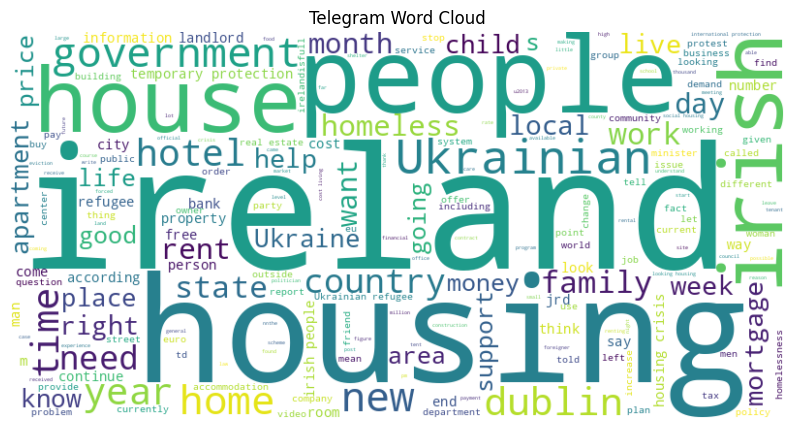

In [ ]:
# create the word cloud

telegram_Lemmatizer = '/content/drive/My Drive/Aedeen/Telegram/TelegramLemmatizer.csv'

word_cloud (telegram_Lemmatizer, "Telegram")

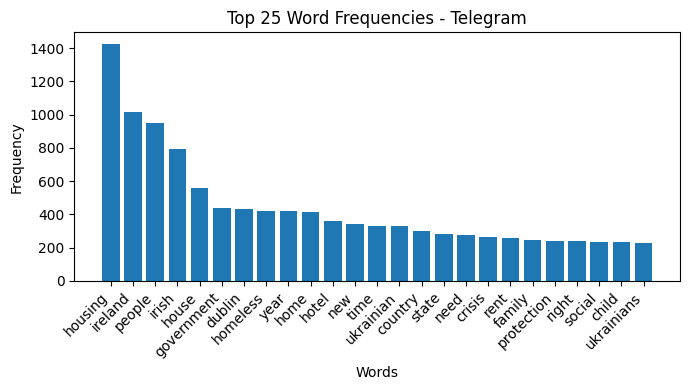

In [ ]:
#count word frequencies

telegram_Lemmatizer = '/content/drive/My Drive/Aedeen/Telegram/TelegramLemmatizer.csv'

count_word_frequencies(telegram_Lemmatizer, "Telegram")


In [ ]:
# Measure the sentiment analysis at social media type, text level

telegram_Lemmatizer = '/content/drive/My Drive/Aedeen/Telegram/TelegramLemmatizer.csv'
telegram_MessageSentiment = '/content/drive/My Drive/Aedeen/Telegram/TelegramMessageSentiment.csv'
calculate_message_sentimentscore (telegram_Lemmatizer, telegram_MessageSentiment, "Telegram")

Vader + TextBlob sentiment added to the file


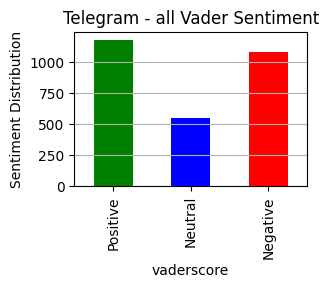

Telegram all records Text Blob Overall sentiment:  Positive
Telegram all records Text Blob Overall polarity:  0.056323808342813544
Telegram all records Text Blob Overall subjectivity:  0.4042263635676798


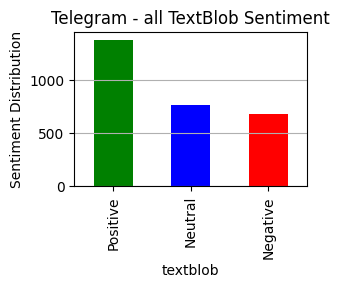

In [ ]:
# Measure the sentiment analysis

telegram_MessageSentiment = '/content/drive/My Drive/Aedeen/Telegram/TelegramMessageSentiment.csv'
calculate_sentimentscore (telegram_MessageSentiment, "Telegram", "all")


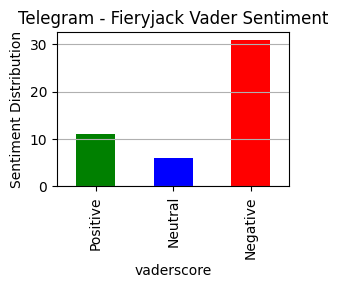

Telegram Fieryjack records Text Blob Overall sentiment:  Negative
Telegram Fieryjack records Text Blob Overall polarity:  -0.03099003189792664
Telegram Fieryjack records Text Blob Overall subjectivity:  0.4804109326346167


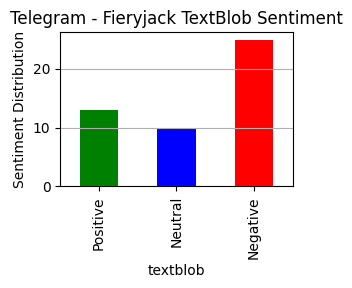

In [ ]:
# Measure the sentiment analysis at social media type, user level

telegram_Lemmatizer = '/content/drive/My Drive/Aedeen/Telegram/TelegramLemmatizer.csv'
calculate_sentimentscore (telegram_MessageSentiment, "Telegram", "Fieryjack")

#irelandisfull,Fieryjack

In [ ]:
# Split the test file, pass in the X and y values, call the Vectors and fit / transform data for Vader

telegram_MessageSentiment = '/content/drive/My Drive/Aedeen/Telegram/TelegramMessageSentiment.csv'


In [ ]:
# Call Linear Regression Model for Vader results
calculatemodelresults (telegram_MessageSentiment, "text", "vaderscore", "LR", "Telegram")

Count Vectorizer Classification Report Logistic Regression VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.67      0.66      0.66       216
     Neutral       0.60      0.71      0.65       113
    Positive       0.77      0.71      0.74       235

    accuracy                           0.69       564
   macro avg       0.68      0.69      0.68       564
weighted avg       0.70      0.69      0.69       564

Count Vectorizer Accuracy Score Logistic Regression VADER Telegram data
0.6897163120567376

TF-IDF Classification Report Logistic Regression VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.62      0.69      0.65       216
     Neutral       0.65      0.37      0.47       113
    Positive       0.67      0.74      0.71       235

    accuracy                           0.65       564
   macro avg       0.65      0.60      0.61       564
weighted avg       0.65      0.65      0.64       564

In [ ]:
# Call Decision Tree Model for Vader results
calculatemodelresults (telegram_MessageSentiment, "text", "vaderscore", "DT", "Telegram")

Count Vectorizer Classification Report Decision Tree VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.58      0.61      0.59       216
     Neutral       0.55      0.58      0.56       113
    Positive       0.70      0.65      0.67       235

    accuracy                           0.62       564
   macro avg       0.61      0.61      0.61       564
weighted avg       0.62      0.62      0.62       564

Count Vectorizer Accuracy Score Decision Tree VADER Telegram data
0.6187943262411347

TF-IDF Classification Report Decision Tree VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.58      0.57      0.58       216
     Neutral       0.45      0.61      0.52       113
    Positive       0.68      0.57      0.62       235

    accuracy                           0.58       564
   macro avg       0.57      0.58      0.57       564
weighted avg       0.60      0.58      0.58       564

TF-IDF Accuracy 

In [ ]:
# Call Random Forest Model for Vader results
calculatemodelresults (telegram_MessageSentiment, "text", "vaderscore", "RF", "Telegram")

Count Vectorizer Classification Report Random Forest VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.66      0.61      0.63       216
     Neutral       0.57      0.69      0.62       113
    Positive       0.76      0.74      0.75       235

    accuracy                           0.68       564
   macro avg       0.66      0.68      0.67       564
weighted avg       0.68      0.68      0.68       564

Count Vectorizer Accuracy Score Random Forest VADER Telegram data
0.6773049645390071

TF-IDF Classification Report Random Forest VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.68      0.61      0.64       216
     Neutral       0.59      0.65      0.62       113
    Positive       0.72      0.74      0.73       235

    accuracy                           0.68       564
   macro avg       0.66      0.67      0.66       564
weighted avg       0.68      0.68      0.68       564

TF-IDF Accuracy 

In [ ]:
# Call SVM Model for Vader results
calculatemodelresults (telegram_MessageSentiment, "text", "vaderscore", "SVM", "Telegram")

Count Vectorizer Classification Report Support Vector Machine VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.61      0.64      0.62       216
     Neutral       0.56      0.66      0.61       113
    Positive       0.75      0.65      0.70       235

    accuracy                           0.65       564
   macro avg       0.64      0.65      0.64       564
weighted avg       0.66      0.65      0.65       564

Count Vectorizer Accuracy Score Support Vector Machine VADER Telegram data
0.6471631205673759

TF-IDF Classification Report Support Vector Machine VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.64      0.67      0.65       216
     Neutral       0.63      0.51      0.57       113
    Positive       0.68      0.72      0.70       235

    accuracy                           0.66       564
   macro avg       0.65      0.63      0.64       564
weighted avg       0.66      0.66      0.66 

In [ ]:
# Call KNN Model for Vader results
calculatemodelresults (telegram_MessageSentiment, "text", "vaderscore", "KNN", "Telegram")

Count Vectorizer Classification Report K-Nearest Neighbor VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.48      0.26      0.34       216
     Neutral       0.26      0.91      0.40       113
    Positive       0.69      0.14      0.23       235

    accuracy                           0.34       564
   macro avg       0.48      0.44      0.32       564
weighted avg       0.52      0.34      0.31       564

Count Vectorizer Accuracy Score K-Nearest Neighbor VADER Telegram data
0.3404255319148936

TF-IDF Classification Report K-Nearest Neighbor VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.60      0.08      0.15       216
     Neutral       0.21      0.96      0.34       113
    Positive       0.87      0.06      0.10       235

    accuracy                           0.25       564
   macro avg       0.56      0.37      0.20       564
weighted avg       0.63      0.25      0.17       564

T

In [ ]:
# Call Naive Bayes Model for Vader results
calculatemodelresults (telegram_MessageSentiment, "text", "vaderscore", "NB", "Telegram")

Count Vectorizer Classification Report Naive Bayes VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.61      0.65      0.63       216
     Neutral       0.47      0.50      0.49       113
    Positive       0.66      0.60      0.63       235

    accuracy                           0.60       564
   macro avg       0.58      0.59      0.58       564
weighted avg       0.60      0.60      0.60       564

Count Vectorizer Accuracy Score Naive Bayes VADER Telegram data
0.601063829787234

TF-IDF Classification Report Naive Bayes VADER Telegram data
              precision    recall  f1-score   support

    Negative       0.61      0.71      0.66       216
     Neutral       0.61      0.18      0.27       113
    Positive       0.62      0.74      0.67       235

    accuracy                           0.61       564
   macro avg       0.61      0.54      0.53       564
weighted avg       0.61      0.61      0.59       564

TF-IDF Accuracy Score N

In [ ]:
# Call Linear Regression Model for textblob results
calculatemodelresults (telegram_MessageSentiment, "text", "textblob", "LR", "Telegram")

Count Vectorizer Classification Report Logistic Regression TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.50      0.44      0.47       130
     Neutral       0.68      0.79      0.73       156
    Positive       0.75      0.73      0.74       278

    accuracy                           0.68       564
   macro avg       0.64      0.65      0.65       564
weighted avg       0.68      0.68      0.68       564

Count Vectorizer Accuracy Score Logistic Regression TextBlob Telegram data
0.6790780141843972

TF-IDF Classification Report Logistic Regression TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.50      0.32      0.39       130
     Neutral       0.71      0.63      0.67       156
    Positive       0.67      0.83      0.74       278

    accuracy                           0.66       564
   macro avg       0.63      0.59      0.60       564
weighted avg       0.64      0.66      0.64 

In [ ]:
# Call Decision Tree Model for textblob results
calculatemodelresults (telegram_MessageSentiment, "text", "textblob", "DT", "Telegram")

Count Vectorizer Classification Report Decision Tree TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.44      0.39      0.42       130
     Neutral       0.72      0.71      0.71       156
    Positive       0.73      0.78      0.76       278

    accuracy                           0.67       564
   macro avg       0.63      0.63      0.63       564
weighted avg       0.66      0.67      0.67       564

Count Vectorizer Accuracy Score Decision Tree TextBlob Telegram data
0.6702127659574468

TF-IDF Classification Report Decision Tree TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.42      0.37      0.39       130
     Neutral       0.63      0.62      0.63       156
    Positive       0.73      0.77      0.75       278

    accuracy                           0.64       564
   macro avg       0.59      0.59      0.59       564
weighted avg       0.63      0.64      0.63       564

TF-IDF 

In [ ]:
# Call Random Forest Model for textblob results
calculatemodelresults (telegram_MessageSentiment, "text", "textblob", "RF", "Telegram")

Count Vectorizer Classification Report Random Forest TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.73      0.28      0.40       130
     Neutral       0.71      0.87      0.78       156
    Positive       0.75      0.87      0.81       278

    accuracy                           0.74       564
   macro avg       0.73      0.67      0.66       564
weighted avg       0.74      0.74      0.71       564

Count Vectorizer Accuracy Score Random Forest TextBlob Telegram data
0.7358156028368794

TF-IDF Classification Report Random Forest TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.64      0.22      0.33       130
     Neutral       0.67      0.81      0.73       156
    Positive       0.72      0.86      0.79       278

    accuracy                           0.70       564
   macro avg       0.68      0.63      0.62       564
weighted avg       0.69      0.70      0.67       564

TF-IDF 

In [ ]:
# Call SVM Model for textblob results
calculatemodelresults (telegram_MessageSentiment, "text", "textblob", "SVM", "Telegram")

Count Vectorizer Classification Report Support Vector Machine TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.43      0.48      0.45       130
     Neutral       0.69      0.77      0.73       156
    Positive       0.79      0.68      0.73       278

    accuracy                           0.66       564
   macro avg       0.63      0.65      0.64       564
weighted avg       0.68      0.66      0.67       564

Count Vectorizer Accuracy Score Support Vector Machine TextBlob Telegram data
0.6613475177304965

TF-IDF Classification Report Support Vector Machine TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.49      0.35      0.41       130
     Neutral       0.67      0.74      0.71       156
    Positive       0.72      0.77      0.75       278

    accuracy                           0.67       564
   macro avg       0.63      0.62      0.62       564
weighted avg       0.65      0.67  

In [ ]:
# Call K Nearest Neighbour Model for textblob results
calculatemodelresults (telegram_MessageSentiment, "text", "textblob", "KNN", "Telegram")

Count Vectorizer Classification Report K-Nearest Neighbor TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.42      0.08      0.13       130
     Neutral       0.32      0.99      0.49       156
    Positive       0.84      0.19      0.31       278

    accuracy                           0.38       564
   macro avg       0.53      0.42      0.31       564
weighted avg       0.60      0.38      0.32       564

Count Vectorizer Accuracy Score K-Nearest Neighbor TextBlob Telegram data
0.38475177304964536

TF-IDF Classification Report K-Nearest Neighbor TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.33      0.03      0.06       130
     Neutral       0.28      0.95      0.43       156
    Positive       0.76      0.05      0.09       278

    accuracy                           0.29       564
   macro avg       0.46      0.34      0.19       564
weighted avg       0.53      0.29      0.17   

In [ ]:
# Call Naive Bayes Model for textblob results
calculatemodelresults (telegram_MessageSentiment, "text", "textblob", "NB", "Telegram")

Count Vectorizer Classification Report Naive Bayes TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.45      0.46      0.46       130
     Neutral       0.69      0.67      0.68       156
    Positive       0.71      0.71      0.71       278

    accuracy                           0.64       564
   macro avg       0.62      0.61      0.61       564
weighted avg       0.64      0.64      0.64       564

Count Vectorizer Accuracy Score Naive Bayes TextBlob Telegram data
0.6418439716312057

TF-IDF Classification Report Naive Bayes TextBlob Telegram data
              precision    recall  f1-score   support

    Negative       0.61      0.19      0.29       130
     Neutral       0.70      0.37      0.49       156
    Positive       0.57      0.90      0.70       278

    accuracy                           0.59       564
   macro avg       0.63      0.49      0.49       564
weighted avg       0.62      0.59      0.55       564

TF-IDF Accura

In [ ]:
# Read in CSV file *** code is as per Kaggle will have to be amended***

GovFile = '/content/drive/My Drive/Aedeen/GovStats/Homeless_Ireland.csv'

GovData = pd.read_csv(GovFile)

# Check the 1st 5 rows to ensure that dataset loaded as expected
GovData.head(5)

,Region,Total Adults,Male Adults,Female Adults,Adults Aged 18-24,Adults Aged 25-44,Adults Aged 45-64,Adults Aged 65+,Number of people who accessed Private Emergency Accommodation,Number of people who accessed Supported Temporary Accommodation,...,Number of people who accessed Other Accommodation,Number of Families,Number of Adults in Families,Number of Single-Parent families,Number of Dependants in Families,Irish,EEA/UK,Non-EEA,Month,Year
0,Dublin,3919.0,2194.0,1725.0,609.0,2447.0,792.0,71.0,1631,2279.0,...,0.0,1191.0,1658.0,724.0,2509.0,NaN,NaN,NaN,January,2018.0
1,Mid-East,290.0,171.0,119.0,46.0,163.0,77.0,4.0,153,114.0,...,0.0,33.0,46.0,20.0,90.0,NaN,NaN,NaN,January,2018.0
2,Midlands,78.0,43.0,35.0,17.0,47.0,13.0,1.0,38,40.0,...,0.0,18.0,25.0,11.0,38.0,NaN,NaN,NaN,January,2018.0
3,Mid-West,372.0,207.0,165.0,53.0,227.0,83.0,9.0,88,247.0,...,0.0,75.0,110.0,40.0,153.0,NaN,NaN,NaN,January,2018.0
4,North-East,155.0,90.0,65.0,28.0,91.0,31.0,5.0,101,51.0,...,0.0,52.0,73.0,31.0,101.0,NaN,NaN,NaN,January,2018.0


In [ ]:
#df.groupby(['Date', 'Keyword'])['Views'].sum().reset_index()
GovData_year = GovData.groupby(['Region','Year'])[['Total Adults', 'Male Adults', 'Female Adults',
       'Adults Aged 18-24', 'Adults Aged 25-44', 'Adults Aged 45-64',
       'Adults Aged 65+',
       'Number of people who accessed Private Emergency Accommodation',
       'Number of people who accessed Supported Temporary Accommodation',
       'Number of people who accessed Temporary Emergency Accommodation',
       'Number of people who accessed Other Accommodation',
       'Number of Families', 'Number of Adults in Families',
       'Number of Single-Parent families', 'Number of Dependants in Families',
       'Irish', 'EEA/UK', 'Non-EEA' ]].mean().reset_index()

# Check the 1st 5 rows to ensure that dataset loaded as expected
GovData_year.head(5)

,Region,Year,Total Adults,Male Adults,Female Adults,Adults Aged 18-24,Adults Aged 25-44,Adults Aged 45-64,Adults Aged 65+,Number of people who accessed Private Emergency Accommodation,Number of people who accessed Supported Temporary Accommodation,Number of people who accessed Temporary Emergency Accommodation,Number of people who accessed Other Accommodation,Number of Families,Number of Adults in Families,Number of Single-Parent families,Number of Dependants in Families,Irish,EEA/UK,Non-EEA
0,Dublin,2018,4042.416667,2224.000000,1818.416667,600.166667,2476.916667,890.500000,214.166667,1826.666667,2271.166667,65.250000,0.0,1311.083333,1828.50,793.583333,2794.166667,NaN,NaN,NaN
1,Dublin,2019,4377.916667,2522.083333,1855.833333,571.833333,2597.500000,1132.583333,76.000000,2188.666667,2243.833333,69.333333,0.0,1269.583333,1815.75,723.416667,2786.416667,NaN,NaN,NaN
2,Dublin,2020,4265.666667,2703.333333,1562.333333,491.666667,2482.750000,1217.666667,73.583333,2353.666667,1930.750000,40.500000,0.0,894.750000,1310.00,479.500000,2091.750000,NaN,NaN,NaN
3,Dublin,2021,4235.250000,2768.083333,1466.916667,611.250000,2393.416667,1168.166667,62.416667,2345.666667,1932.583333,33.750000,0.0,734.916667,1174.00,352.500000,1786.555556,NaN,NaN,NaN
4,Dublin,2022,5208.000000,3351.000000,1857.000000,921.500000,2788.666667,1420.250000,77.583333,3037.833333,2191.833333,35.916667,0.0,1004.750000,1438.50,768.916667,2300.833333,3028.111111,1334.444444,1006.222222


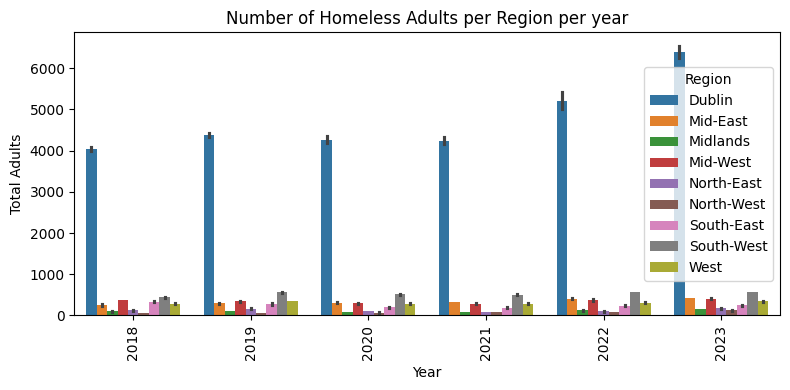

In [ ]:
#New - Valid
#Using Seaborn to see the number of homeless adults in each region over the past six years.
plt.figure(figsize=(8,4))
plt.title ("Number of Homeless Adults per Region per year")

sns.barplot(x = 'Year', y = 'Total Adults', data = GovData, hue = 'Region')
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()


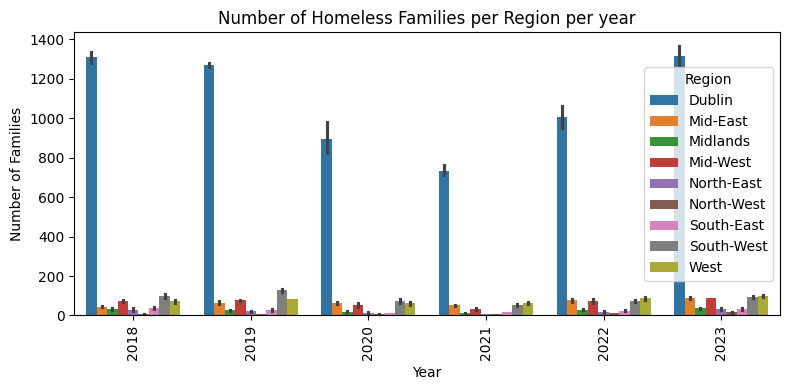

In [ ]:
#New - Valid
#Using Seaborn to see the number of homeless families in each region over the past six years.
plt.figure(figsize=(8,4))
plt.title ("Number of Homeless Families per Region per year")

sns.barplot(x = 'Year', y = 'Number of Families', data = GovData, hue = 'Region')
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()

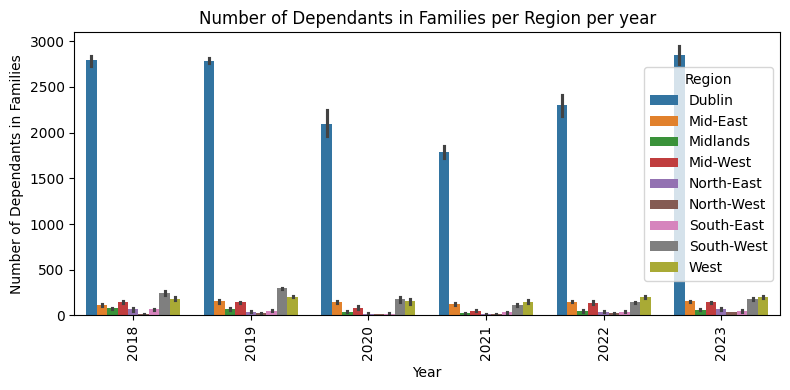

In [ ]:
#New - Valid
#Using Seaborn to see the number of dependants in families in each region over the past six years.
plt.figure(figsize=(8,4))
plt.title ("Number of Dependants in Families per Region per year")

sns.barplot(x = 'Year', y = 'Number of Dependants in Families', data = GovData, hue = 'Region')
plt.xticks(plt.xticks()[0], rotation=90)
plt.tight_layout()

In [ ]:
Males = px.bar(GovData_year, x = 'Year', y = 'Male Adults', color = 'Region', height = 400)
Males.update_layout(barmode='group')
Males

In [ ]:
females = px.bar(GovData_year, x = 'Year', y = 'Female Adults', color = 'Region', height = 400)
females.update_layout(barmode='group')
females

In [ ]:
# Using plotly express, this can be made a bit clearer for each year and each region.
# As can be seen, the highest total amount of homeless adults in Ireland is significantly concentrated in Dublin,
# while the next would be in the South-West (Cork and Kerry Counties).

In [ ]:
totaladults = px.bar(GovData_year, x = 'Year', y = 'Total Adults', color = 'Region', height = 500)
totaladults.update_layout(barmode='group')
totaladults

In [ ]:
#Now, let's have a look at the different types of accommodation available to homeless people.
#To start, let's compare how much each type of accommodation has been used in total.

accom_year = GovData.groupby(['Year'])[['Number of people who accessed Private Emergency Accommodation',
       'Number of people who accessed Supported Temporary Accommodation',
       'Number of people who accessed Temporary Emergency Accommodation',
       'Number of people who accessed Other Accommodation']].sum()

In [ ]:
accom_sum = accom_year[['Number of people who accessed Private Emergency Accommodation',
       'Number of people who accessed Supported Temporary Accommodation',
       'Number of people who accessed Temporary Emergency Accommodation',
       'Number of people who accessed Other Accommodation']].sum()

In [ ]:
accom_sums = accom_sum.to_frame().reset_index()

accom_sums

,index,0
0,Number of people who accessed Private Emergenc...,264774
1,Number of people who accessed Supported Tempor...,222911
2,Number of people who accessed Temporary Emerge...,9826
3,Number of people who accessed Other Accommodation,923


In [ ]:
accom_sums.rename(columns = {'index':'Type of Accommodation', 0:'Total'}, inplace = True)

accom_sums

,Type of Accommodation,Total
0,Number of people who accessed Private Emergenc...,264774
1,Number of people who accessed Supported Tempor...,222911
2,Number of people who accessed Temporary Emerge...,9826
3,Number of people who accessed Other Accommodation,923


In [ ]:
fig6 = px.scatter(accom_sums, x = 'Type of Accommodation', y = 'Total', height = 600)
fig6

In [ ]:
accom_year['Total'] = accom_year.sum(axis = 1)

accom_year

,Number of people who accessed Private Emergency Accommodation,Number of people who accessed Supported Temporary Accommodation,Number of people who accessed Temporary Emergency Accommodation,Number of people who accessed Other Accommodation,Total
Year,,,,,
2018,32780,38619,1831,422,73652
2019,39863,38049,1851,262,80025
2020,39724,33335,1525,35,74619
2021,38733,33687,1437,32,73889
2022,50027,38201,1589,49,89866
2023,63647,41020,1593,123,106383


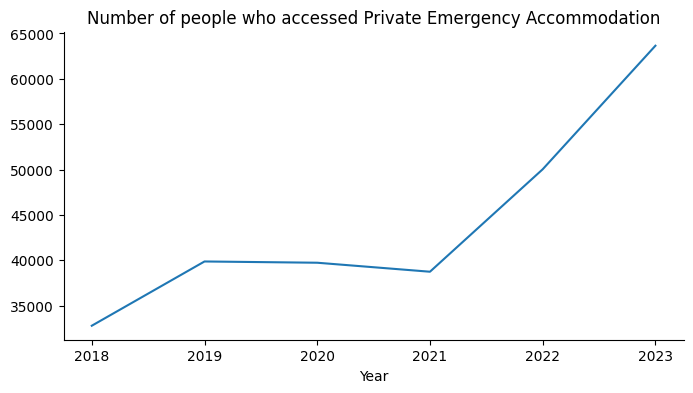

In [ ]:
# @title Number of people who accessed Private Emergency Accommodation

from matplotlib import pyplot as plt
accom_year['Number of people who accessed Private Emergency Accommodation'].plot(kind='line', figsize=(8, 4), title='Number of people who accessed Private Emergency Accommodation')
plt.gca().spines[['top', 'right']].set_visible(False)

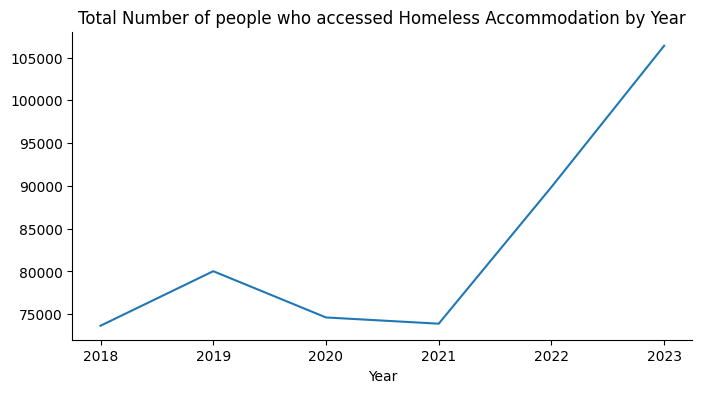

In [ ]:
# @title Number of people who accessed Homeless Accommodation

from matplotlib import pyplot as plt
accom_year['Total'].plot(kind='line', figsize=(8, 4), title='Total Number of people who accessed Homeless Accommodation by Year')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Here's an interactive figure of Private Emergency Accommodation

avgPEA = px.bar(GovData_year, x = 'Year', y = 'Number of people who accessed Private Emergency Accommodation', color = 'Region', height = 500)
avgPEA.update_layout(barmode = 'group')
avgPEA

In [ ]:
MonTotal = px.bar(GovData, x = 'Year', y = 'Total Adults', color = 'Month', height = 500)
MonTotal.update_layout(barmode = 'group')
MonTotal

In [ ]:
dub = GovData[GovData['Region'] == 'Dublin']
dubav = dub.drop([0]).mean()
dubav = dubav.to_frame()
dubav

<ipython-input-24-3d9b5da8255f>:2: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,0
Total Adults,4764.788732
Male Adults,2945.352113
Female Adults,1819.394366
Adults Aged 18-24,722.380282
Adults Aged 25-44,2692.718310
Adults Aged 45-64,1272.084507
Adults Aged 65+,101.154930
Number of people who accessed Private Emergency Accommodation,2629.591549
Number of people who accessed Supported Temporary Accommodation,2161.915493
Number of people who accessed Temporary Emergency Accommodation,46.521127


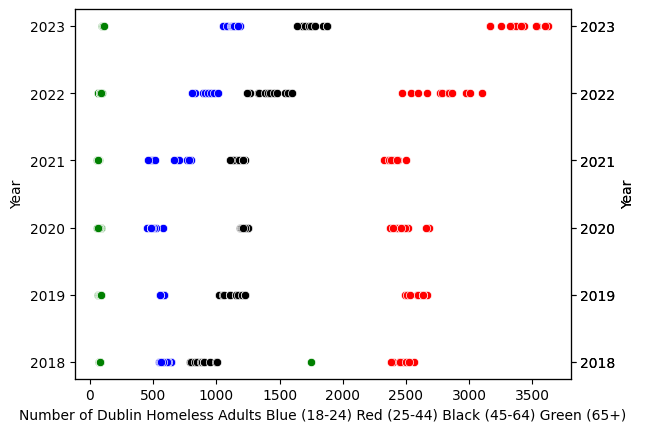

<Figure size 800x400 with 0 Axes>

In [ ]:
# Valid data
fig, ax1 = plt.subplots()
# Use the Filtered Dublin data to apply blue line for Adults Aged 18-24
sns.scatterplot (data=dub, y= 'Year', x = 'Adults Aged 18-24', color ='blue', ax=ax1)
ax2 = ax1.twinx()
# Use the Filtered Dublin data to apply red line for Adults Aged 25-44
sns.scatterplot(data=dub, y= 'Year', x = 'Adults Aged 25-44', color ='red', ax=ax2)
ax3 = ax1.twinx()
# Use the Filtered Dublin data to apply black line for Adults Aged 45-64
sns.scatterplot(data=dub, y= 'Year', x = 'Adults Aged 45-64', color ='black', ax=ax3)
# Use the Filtered Dublin data to apply black line for Adults Aged 65+
sns.scatterplot(data=dub, y= 'Year', x = 'Adults Aged 65+', color ='green', ax=ax3)
#Set the label to describe the data
ax1.set_xlabel('Number of Dublin Homeless Adults Blue (18-24) Red (25-44) Black (45-64) Green (65+)')
plt.figure(figsize=(8,4))
plt.show()

Text(0.5, 0, 'Number of Dublin Homeless Adults Red (Female) Blue (Male) Black (Total)')

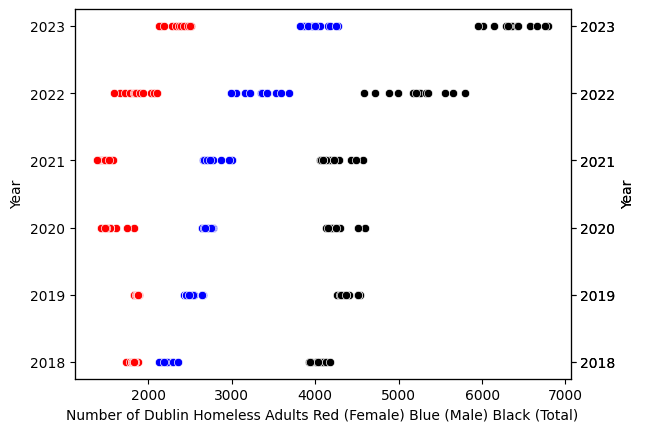

In [ ]:
# Valid data
fig, ax1 = plt.subplots()

# Use the Filtered Dublin data to apply blue line for Male Adults
sns.scatterplot (data=dub, y= 'Year', x = 'Male Adults', color ='blue', ax=ax1)
ax2 = ax1.twinx()

# Use the Filtered Dublin data to apply red line for Female Adults
sns.scatterplot(data=dub, y= 'Year', x = 'Female Adults', color ='red', ax=ax2)
ax3 = ax1.twinx()

# Use the Filtered Dublin data to apply black line for Total Adults
sns.scatterplot(data=dub, y= 'Year', x = 'Total Adults', color ='black', ax=ax3)

#Set the label to describe the data
ax1.set_xlabel('Number of Dublin Homeless Adults Red (Female) Blue (Male) Black (Total)')